In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import os
os.chdir(r'G:\Cap1\data')

In [3]:
# read company financial data
fin_data = pd.read_csv('na_enterprize.csv', sep = ',', header = 0)

C:\Users\babsab\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fin_data.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
0,1004,19950531,1994.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN
1,1004,19960531,1995.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN
2,1004,19970531,1996.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN


In [5]:
# filter the last decade sme data
yr1 = 1999
yr2 = 2012
fin_data_dec1 = fin_data[(fin_data['fyear'] > yr1) & (fin_data['fyear'] < yr2) & (fin_data['fic'] == 'USA') \
                        & (fin_data['curcd'] == 'USD')]
fin_data_dec1['fyear'].unique()

array([ 2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
        2008.,  2009.,  2010.,  2011.])

In [6]:
fin_data_dec1.tail()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
233365,311524,20081231,2008.0,INDL,C,D,STD,TAM,TAMINCO CORP,USD,...,NaN,NaN,NaN,NaN,18195,Allentown,1.0,12,PA,20141208.0
233366,311524,20091231,2009.0,INDL,C,D,STD,TAM,TAMINCO CORP,USD,...,NaN,NaN,NaN,NaN,18195,Allentown,1.0,12,PA,20141208.0
233367,311524,20101231,2010.0,INDL,C,D,STD,TAM,TAMINCO CORP,USD,...,NaN,NaN,NaN,NaN,18195,Allentown,1.0,12,PA,20141208.0
233368,311524,20111231,2011.0,INDL,C,D,STD,TAM,TAMINCO CORP,USD,...,GP,NaN,NaN,QA,18195,Allentown,1.0,12,PA,20141208.0
233389,315318,20111231,2011.0,INDL,C,D,STD,PAH,PLATFORM SPECIALTY PRODUCTS,USD,...,NaN,NaN,NaN,NaN,33401,West Palm Beach,NaN,12,FL,NaN


In [7]:
# filter the data for bankrupt enterprizes
bkrpt_ent_data = fin_data_dec1[fin_data['dlrsn'] == 2]

C:\Users\babsab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [8]:
# create a list of bankrupt enterprizes
bkrpt_ent = bkrpt_ent_data[['tic', 'conm', 'fyear', 'dlrsn', 'dldte']]
bkrpt_ent.columns = ['ticker', 'name', 'fin_year', 'dlrsn', 'bkrpt_date']
bkrpt_ent = bkrpt_ent.drop_duplicates(subset = ['ticker', 'name'], keep = 'last')
bkrpt_ent = bkrpt_ent.sort_values(by = 'bkrpt_date')
bkrpt_ent = bkrpt_ent.set_index('ticker').reset_index()
bkrpt_ent = bkrpt_ent.drop(['fin_year', 'dlrsn'], 1)
bkrpt_ent.head()

,ticker,name,bkrpt_date
0,KYC.,KEYSTONE CAMERA PRODUCTS,19920331.0
1,3HDTV.,HI-DEF ENTERPRISE INC,19930331.0
2,NAMS,NAMSCO CORP,19940331.0
3,3SCRD,SCIENTIFIC RADIO SYSTEMS INC,19950930.0
4,3UBDT,UBRANDIT.COM,20020131.0


In [9]:
def conv(x):
    return pd.Period(year = x // 10000, month = x//100 % 100, day = x%100, freq='D')

bkrpt_ent['bkrpt_date'] = bkrpt_ent['bkrpt_date'].apply(conv)

In [10]:
# filter the enterprizes that defaulted during or after 2009
year = 2009
bkrpt_ent = bkrpt_ent[bkrpt_ent['bkrpt_date'] > pd.Period(year = year, month = 1, day = 1, freq='D')]
print "Total enterprizes defaulted during or after", year, " : ", len(bkrpt_ent)
bkrpt_ent.tail()

Total enterprizes defaulted during or after 2009  :  87


,ticker,name,bkrpt_date
117,FWMHQ,FAIRWAY GROUP HOLDINGS,2016-07-07
118,ANRZQ,ALPHA NATURAL RESOURCES INC,2016-07-28
119,DXMMQ,DEX MEDIA INC,2016-08-01
120,SMXIQ,SEBRING SOFTWARE INC,2016-08-15
121,KWKAQ,QUICKSILVER RESOURCES INC,2016-09-01


In [11]:
# keep only the above enterprizes in the last decade default data
# merge bkrpt_ent_data with the bkrpt_ent on ticker, lh = later half
bkrpt_lh = bkrpt_ent_data.merge(bkrpt_ent, how='right', left_on='tic', right_on='ticker')
bkrpt_lh = bkrpt_lh.drop(['ticker', 'name', 'bkrpt_date'], 1)
bkrpt_lh.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
0,1367,20000630,2000.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0
1,1367,20010630,2001.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0
2,1367,20020630,2002.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0


In [12]:
# filter the data for non-defaulting enterprizes
nd_ent = fin_data_dec1[fin_data['dlrsn'] != 2]
nd_ent.shape

C:\Users\babsab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(101929, 44)

In [13]:
# concat the default and non-default data
dec1 = pd.concat([bkrpt_lh, nd_ent])
dec1.shape

(102679, 44)

In [14]:
# add default column
dec1.ix[dec1['dlrsn']==2,'default'] = 1;
dec1.ix[dec1['dlrsn']!=2,'default'] = 0;
dec1.shape

(102679, 45)

In [15]:
fcwise = dec1.set_index('tic', 'fyear').reset_index()
fcwise.head(3)

,tic,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,...,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte,default
0,3AMBEQ,1367,20000630,2000.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0
1,3AMBEQ,1367,20010630,2001.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0
2,3AMBEQ,1367,20020630,2002.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0


In [16]:
# filter small and medium enterprizes - those with average sale less than $65M
avg_sale = fcwise[['tic', 'conm', 'sale']].groupby('tic').mean()
sme_sales = avg_sale[avg_sale['sale'] <= 65]
sme_sales = sme_sales.reset_index()
len(sme_sales)

6091

In [17]:
# keep only the sme data in sme_data
sme_data = fcwise.merge(sme_sales, how='right', left_on='tic', right_on='tic')
sme_data = sme_data.drop('sale_y', 1)
sme_data.shape

(37105, 45)

In [18]:
fdd1 = sme_data[['fyear', 'tic', 'default']].groupby(['fyear', 'default'])['tic'].count().reset_index()
fdd1 = fdd1.set_index(['fyear', 'default'])
fdd1 = fdd1.unstack('default')
fdd1.columns = fdd1.columns.droplevel(0)
fdd1['ratio'] = fdd1.iloc[:,0] / fdd1.iloc[:,1]
fdd1.head()

default,0.0,1.0,ratio
fyear,,,
2000.0,4058,20,202.900000
2001.0,3826,20,191.300000
2002.0,3515,20,175.750000
2003.0,3296,22,149.818182
2004.0,3134,25,125.360000


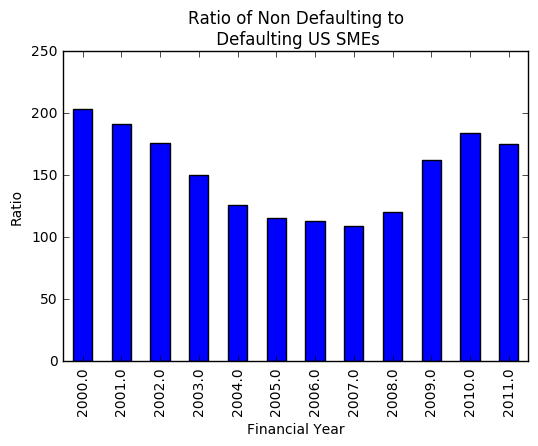

In [19]:
ax = fdd1['ratio'].plot(kind='bar')
ax.set_title('Ratio of Non Defaulting to\n Defaulting US SMEs')
ax.set_xlabel('Financial Year')
ax.set_ylabel('Ratio')

In [20]:
# drop not needed columns
sme_data = sme_data.drop(['consol', 'popsrc', 'datafmt', 'ap_fn', 'at_fn', 'ni_fn', 're_fn', 'sale_fn', 'xint_fn'], 1)

In [21]:
sme_d = sme_data[sme_data['default']==1]
sme_nd = sme_data[sme_data['default']==0]

In [22]:
# now, we have three data sets
# 1. sme_data - all enterprizes data
# 2. sme_d - defaulting enterprizes data
# 3. sme_nd - non-defaulting enterprizes data

print 'shape of sme_data', sme_data.shape
print 'shape of sme_d', sme_d.shape
print 'shape of sme_nd', sme_nd.shape

shape of sme_data (37105, 36)
shape of sme_d (251, 36)
shape of sme_nd (36854, 36)


In [23]:
sme_d_pts = sme_d.groupby('tic').count().reset_index()
sme_d_pts.iloc[:,8:27].head()

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,recd,rect,rectr,sale_x,seq,teq,wcap,xint
0,12,12,12,12,12,12,12,12,12,12,12,10,12,12,12,12,12,12,12
1,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,0,3,3
2,9,9,9,9,9,9,9,9,9,9,9,4,9,9,9,9,0,9,8
3,9,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,0,9,9
4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,12,12


In [24]:
sme_d_pts.mean()[7:26]

ap        8.241379
at        8.241379
ceq       8.241379
ceql      8.103448
ch        8.206897
ebit      8.172414
ebitda    8.172414
intan     8.137931
lt        8.241379
ni        8.172414
re        8.241379
recd      5.275862
rect      8.241379
rectr     8.241379
sale_x    8.172414
seq       8.241379
teq       2.793103
wcap      7.896552
xint      8.034483
dtype: float64

In [25]:
sme_d_pts.median()[7:26]

ap        9.0
at        9.0
ceq       9.0
ceql      9.0
ch        9.0
ebit      9.0
ebitda    9.0
intan     8.0
lt        9.0
ni        9.0
re        9.0
recd      5.0
rect      9.0
rectr     9.0
sale_x    9.0
seq       9.0
teq       1.0
wcap      8.0
xint      8.0
dtype: float64

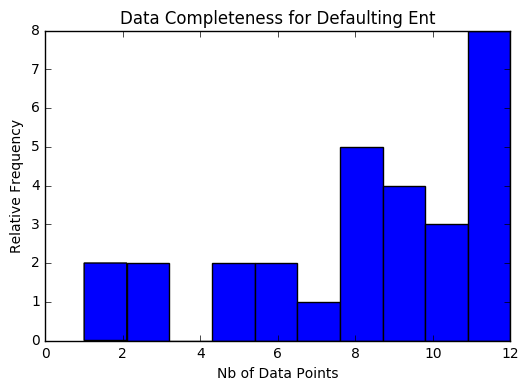

In [26]:
aap = sme_d_pts['ap'].plot(kind='hist')
aap.set_ylabel('Relative Frequency')
aap.set_xlabel('Nb of Data Points')
aap.set_title('Data Completeness for Defaulting Ent')

In [27]:
sme_nd_pts = sme_nd.groupby('tic').count().reset_index()
sme_nd_pts.iloc[:,8:27].head()

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,recd,rect,rectr,sale_x,seq,teq,wcap,xint
0,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,0,3,3
1,12,12,12,9,3,12,12,12,12,12,12,4,12,12,12,12,10,0,12
2,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,0,5,5
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2
4,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2


In [28]:
sme_nd_pts.mean()[7:26]

ap        5.818872
at        5.824810
ceq       5.820356
ceql      5.677994
ch        5.775322
ebit      5.714286
ebitda    5.704718
intan     5.598152
lt        5.816397
ni        5.786209
re        5.716100
recd      3.419993
rect      5.790333
rectr     4.915210
sale_x    5.785714
seq       5.824315
teq       2.074398
wcap      4.660673
xint      4.503299
dtype: float64

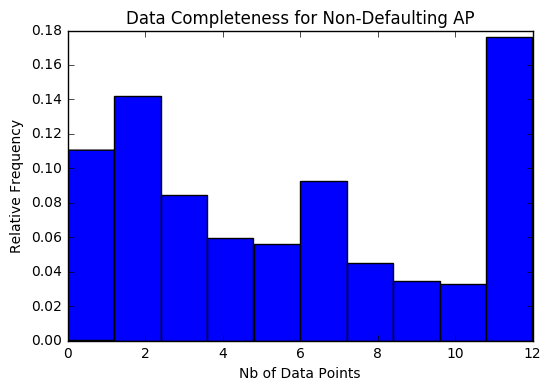

In [29]:
aap1 = sme_nd_pts['ap'].plot(kind='hist', normed=True)
aap1.set_ylabel('Relative Frequency')
aap1.set_xlabel('Nb of Data Points')
aap1.set_title('Data Completeness for Non-Defaulting AP')

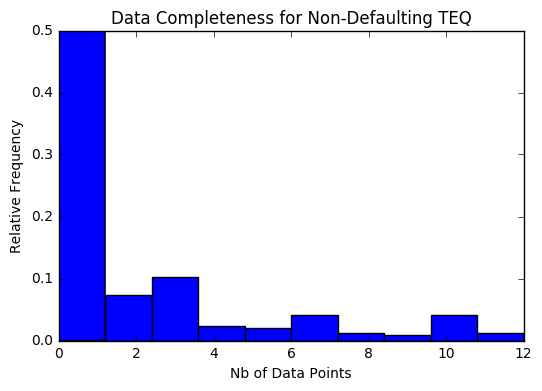

In [30]:
ateq1 = sme_nd_pts['teq'].plot(kind='hist', normed=True)
ateq1.set_ylabel('Relative Frequency')
ateq1.set_xlabel('Nb of Data Points')
ateq1.set_title('Data Completeness for Non-Defaulting TEQ')

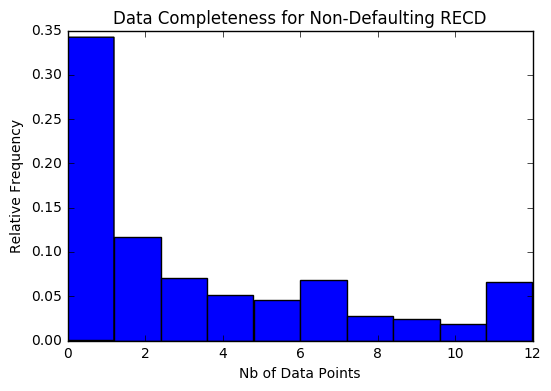

In [31]:
arecd1 = sme_nd_pts['recd'].plot(kind='hist', normed=True)
arecd1.set_ylabel('Relative Frequency')
arecd1.set_xlabel('Nb of Data Points')
arecd1.set_title('Data Completeness for Non-Defaulting RECD')

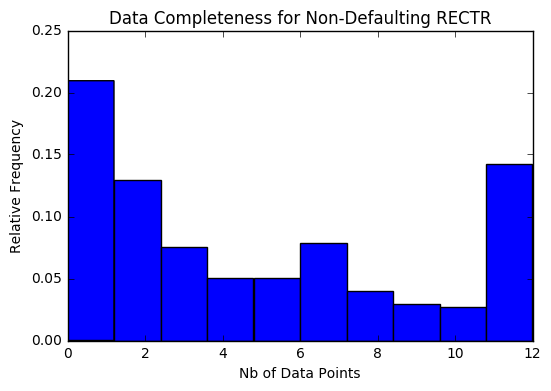

In [32]:
arectr1 = sme_nd_pts['rectr'].plot(kind='hist', normed=True)
arectr1.set_ylabel('Relative Frequency')
arectr1.set_xlabel('Nb of Data Points')
arectr1.set_title('Data Completeness for Non-Defaulting RECTR')

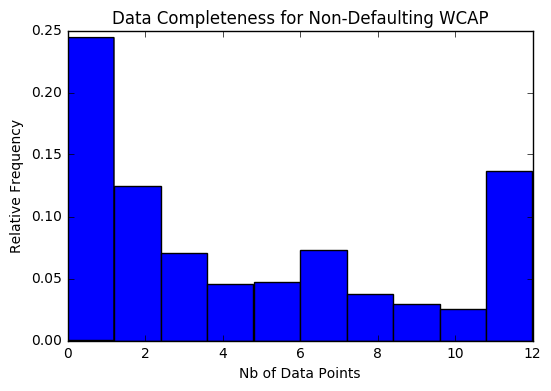

In [33]:
awcap1 = sme_nd_pts['wcap'].plot(kind='hist', normed=True)
awcap1.set_ylabel('Relative Frequency')
awcap1.set_xlabel('Nb of Data Points')
awcap1.set_title('Data Completeness for Non-Defaulting WCAP')

In [34]:
# let's drop the recd, teq because of insufficient data pts
sme_data = sme_data.drop(['recd', 'teq'], 1)
sme_d = sme_d.drop(['recd', 'teq'], 1)
sme_nd = sme_nd.drop(['recd', 'teq'], 1)

In [35]:
# filter non defaulting sme with greater than t data points
t = 9
temp_nd = sme_nd_pts[(sme_nd_pts['ap']>t) & (sme_nd_pts['at']>t) & (sme_nd_pts['ceq']>t) & (sme_nd_pts['ceql']>t) &
            (sme_nd_pts['ch']>t) & (sme_nd_pts['ebit']>t) & (sme_nd_pts['ebitda']>t) & (sme_nd_pts['intan']>t) &
            (sme_nd_pts['lt']>t) & (sme_nd_pts['ni']>t) & (sme_nd_pts['re']>t) & (sme_nd_pts['rect']>t) &
            (sme_nd_pts['rectr']>t) & (sme_nd_pts['sale_x']>t) & (sme_nd_pts['seq']>t) & (sme_nd_pts['wcap']>t) &
            (sme_nd_pts['xint']>t)]

#list of good data non defaulting sme
gd_nd = temp_nd['tic'].reset_index().drop('index', 1)
gd_nd.shape

(809, 1)

In [36]:
gd_sme_nd = gd_nd.merge(sme_nd, how='left', left_on='tic', right_on='tic')
gd_sme_nd.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'ap', u'at', u'ceq', u'ceql', u'ch', u'ebit', u'ebitda',
       u'intan', u'lt', u'ni', u're', u'rect', u'rectr', u'sale_x', u'seq',
       u'wcap', u'xint', u'costat', u'fic', u'addzip', u'city', u'dlrsn',
       u'fyrc', u'state', u'dldte', u'default'],
      dtype='object')

In [37]:
# filter defaulting sme with greater than t data points
t = 7
temp_d = sme_d_pts[(sme_d_pts['ap']>t) & (sme_d_pts['at']>t) & (sme_d_pts['ceq']>t) & (sme_d_pts['ceql']>t) &
            (sme_d_pts['ch']>t) & (sme_d_pts['ebit']>t) & (sme_d_pts['ebitda']>t) & (sme_d_pts['intan']>t) &
            (sme_d_pts['lt']>t) & (sme_d_pts['ni']>t) & (sme_d_pts['re']>t) & (sme_d_pts['rect']>t) &
            (sme_d_pts['rectr']>t) & (sme_d_pts['sale_x']>t) & (sme_d_pts['seq']>t) & (sme_d_pts['wcap']>t) &
            (sme_d_pts['xint']>t)]

#list of good data defaulting sme
gd_d = temp_d['tic'].reset_index().drop('index', 1)
gd_d.shape

(18, 1)

In [38]:
# here we get the full data of the defaulting sme
gd_sme_d = gd_d.merge(sme_d, how='left', left_on='tic', right_on='tic')
gd_sme_d.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'ap', u'at', u'ceq', u'ceql', u'ch', u'ebit', u'ebitda',
       u'intan', u'lt', u'ni', u're', u'rect', u'rectr', u'sale_x', u'seq',
       u'wcap', u'xint', u'costat', u'fic', u'addzip', u'city', u'dlrsn',
       u'fyrc', u'state', u'dldte', u'default'],
      dtype='object')

In [39]:
# find defaulting enterprizes that are common in a range of years
y1 = 2000
y2 = 2007

yrwise_dfs = []
for year in range(y1,y2+1):
    yrwise_dfs.append(gd_sme_d[gd_sme_d['fyear']==year])

df_int = yrwise_dfs[0]
for i in range(1, len(yrwise_dfs)):
    df_int = df_int.merge(yrwise_dfs[i], how='inner', on='tic')

dyy_ent = pd.DataFrame(df_int['tic'])
len(dyy_ent)

16

In [40]:
#lets plot some variables
gd_sme_nd_ap = gd_sme_nd[['tic', 'fyear', 'ap']]
gd_sme_nd_ap.head()

,tic,fyear,ap
0,2638B,2000.0,0.072
1,2638B,2001.0,0.099
2,2638B,2002.0,0.080
3,2638B,2003.0,0.096
4,2638B,2004.0,0.074


In [41]:
gd_sme_nd_apy = gd_sme_nd_ap.set_index(['tic', 'fyear']).unstack('tic')

In [42]:
gd_sme_nd_apy.head()

ap                                                                  \
tic     2638B  3ADTI   3AEMI  3BETM  3DRUG  3EVCL  3GLOB  3INIS  3NEPH  3OISI   
fyear                                                                           
2000.0  0.072  0.144  11.406  0.402  1.436  0.068  0.465  4.460    NaN  0.490   
2001.0  0.099  0.182   6.057  0.249  1.319  0.265  0.262  0.181  1.891  0.627   
2002.0  0.080  0.231   2.231  2.434  1.526  0.735  0.177  0.258  0.946  0.591   
2003.0  0.096  0.262   1.367  0.448  1.428  0.000  0.304  0.321  1.416  0.523   
2004.0  0.074  0.063  18.234  0.516  1.548  0.000  0.122  0.329  0.630  0.472   

        ...                                                                   \
tic     ...     XPOI   YOCM   YORW  YTBLQ   ZAAP   ZANE   ZIXI   ZNCM   ZRBA   
fyear   ...                                                                    
2000.0  ...    0.770  0.881  1.169  0.317  0.398  0.000  2.431  2.427  1.364   
2001.0  ...    0.074  1.142  0.478  0.410  1.282  0.243  3.506  2.448  1.172   
2002.0  ...      NaN  1.084  0.739  0.082  0.498  0.232  2.701  5.398  1.767   
2003.0  ...    0.128  1.145  1.743  0.133  0.538  1.367  3.738  6.580  2.321   
2004.0  ...    0.065  1.208  1.798  0.744  0.150  1.142  1.234  5.319  1.855   

               
tic      ZYXI  
fyear          
2000.0  0.112  
2001.0  0.005  
2002.0  0.004  
2003.0  0.010  
2004.0  0.180  

[5 rows x 809 columns]

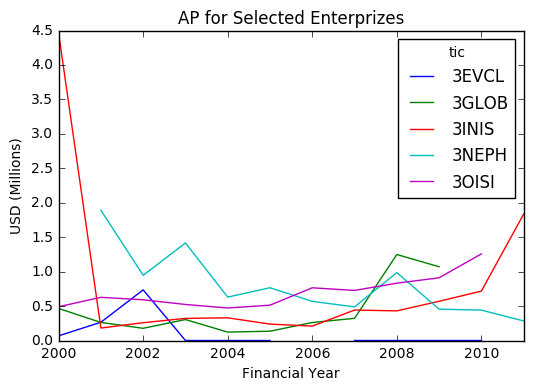

In [43]:
# plot accounts payable for a random range of sme
aapfy = gd_sme_nd_apy.iloc[:,5:10].plot(y='ap')
aapfy.set_xlabel('Financial Year')
aapfy.set_ylabel('USD (Millions)')
aapfy.set_title('AP for Selected Enterprizes')

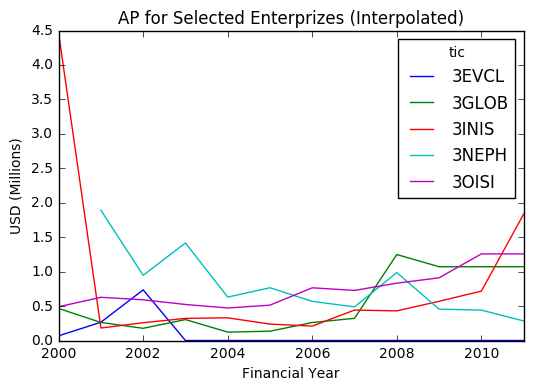

In [44]:
# now plot with interpolation
aapify = gd_sme_nd_apy.iloc[:,5:10].interpolate().plot(y='ap')
aapify.set_xlabel('Financial Year')
aapify.set_ylabel('USD (Millions)')
aapify.set_title('AP for Selected Enterprizes (Interpolated)')

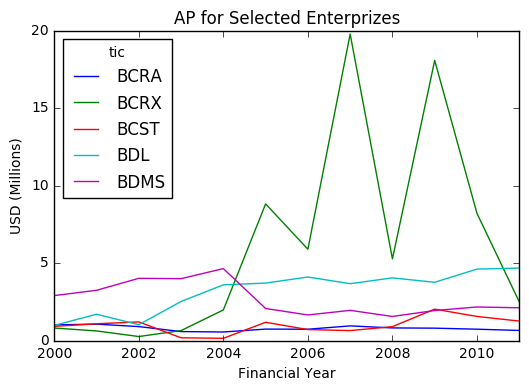

In [45]:
# plot another random range
aap2fy = gd_sme_nd_apy.iloc[:,100:105].plot(y='ap')
aap2fy.set_xlabel('Financial Year')
aap2fy.set_ylabel('USD (Millions)')
aap2fy.set_title('AP for Selected Enterprizes')

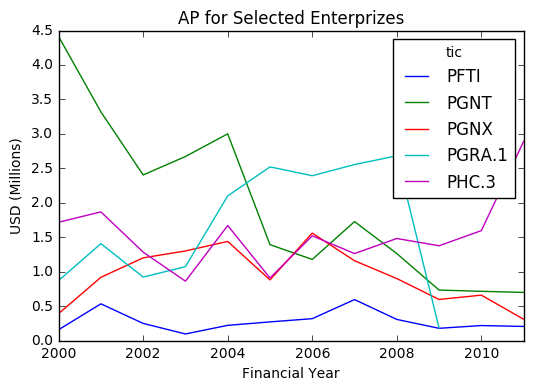

In [46]:
# plot still another random range
aap3fy = gd_sme_nd_apy.iloc[:,559:564].plot(y='ap')
aap3fy.set_xlabel('Financial Year')
aap3fy.set_ylabel('USD (Millions)')
aap3fy.set_title('AP for Selected Enterprizes')

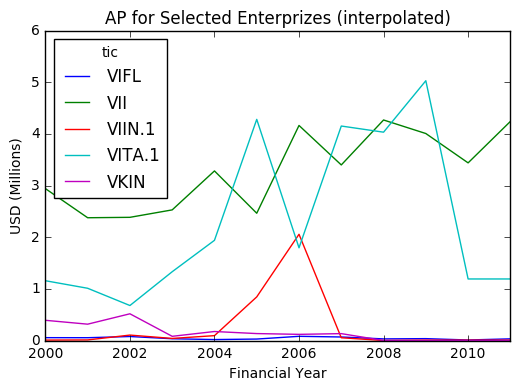

In [47]:
# interpolate this in both directions
aap3ify = gd_sme_nd_apy.iloc[:,759:764].interpolate(limit=3, limit_direction='both').plot(y='ap')
aap3ify.set_xlabel('Financial Year')
aap3ify.set_ylabel('USD (Millions)')
aap3ify.set_title('AP for Selected Enterprizes (interpolated)')

In [48]:
ctd = gd_sme_nd.columns[8:25]
gd_sme_nd_sin_data = gd_sme_nd.drop(ctd, 1)
gd_sme_nd_sin_data.head(1)

,tic,gvkey,datadate,fyear,indfmt,conm,curcd,fyr,costat,fic,addzip,city,dlrsn,fyrc,state,dldte,default
0,2638B,8613,20000930,2000.0,INDL,PISMO COAST VILLAGE INC,USD,9.0,A,USA,93449,Pismo Beach,NaN,9,CA,NaN,0.0


In [49]:
#unstack tic interpolate and stack tic back again
gd_sme_nd_clean = gd_sme_nd.set_index(['tic', 'fyear']).iloc[:,6:23].unstack('tic').interpolate(limit=3, limit_direction='both')
gd_sme_nd_clean = gd_sme_nd_clean.stack('tic').reset_index()
gd_sme_nd_clean = gd_sme_nd_clean.sort_values(by=['tic', 'fyear']).reset_index().drop('index',1)
gd_sme_nd_clean.head(3)

,fyear,tic,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,rect,rectr,sale_x,seq,wcap,xint
0,2000.0,2638B,0.072,6.912,6.351,6.351,1.022,0.409,0.718,0.0,0.561,0.255,0.703,0.007,0.007,3.074,6.351,0.696,0.024
1,2001.0,2638B,0.099,7.177,6.534,6.534,1.122,0.414,0.730,0.0,0.643,0.183,0.887,0.008,0.008,3.259,6.534,0.764,0.000
2,2002.0,2638B,0.080,7.508,6.824,6.824,1.486,0.398,0.735,0.0,0.684,0.289,1.176,0.009,0.009,3.657,6.824,1.101,0.000


In [50]:
gd_sme_nd_cl_full = gd_sme_nd_sin_data.merge(gd_sme_nd_clean, how='left', left_on=['tic', 'fyear'], right_on=['tic', 'fyear'])
gd_sme_nd_cl_full.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'costat', u'fic', u'addzip', u'city', u'dlrsn', u'fyrc',
       u'state', u'dldte', u'default', u'ap', u'at', u'ceq', u'ceql', u'ch',
       u'ebit', u'ebitda', u'intan', u'lt', u'ni', u're', u'rect', u'rectr',
       u'sale_x', u'seq', u'wcap', u'xint'],
      dtype='object')

In [51]:
# find non defaulting enterprizes that are common in a range of years
y1 = 2000
y2 = 2007

yrwise_dfs = []
for year in range(y1,y2+1):
    yrwise_dfs.append(gd_sme_nd_cl_full[gd_sme_nd_cl_full['fyear']==year])

ndf_int = yrwise_dfs[0]
for i in range(1, len(yrwise_dfs)):
    ndf_int = ndf_int.merge(yrwise_dfs[i], how='inner', on='tic')

ndyy_ent = pd.DataFrame(ndf_int['tic'])
len(ndyy_ent)

757

In [52]:
ndyy_samp = ndyy_ent.sample(n=int(len(dyy_ent)/0.0638), axis=0)
len(ndyy_samp)

250

In [53]:
gd_sme_nd_cl_samp = gd_sme_nd_cl_full.merge(ndyy_samp, how='right', on='tic')
#gd_sme_nd_cl_samp.groupby('tic').count()
gd_sme_nd_cl_samp.shape

(2941, 34)

In [54]:
gd_sme_d.shape

(184, 34)

In [55]:
# let's check percent completeness of data
#100 - gd_sme_d.iloc[:,8:25].isnull().sum()/gd_sme_d.iloc[:,8:25].isnull().count()*100
gd_sme_d.iloc[:,8:25].isnull().sum()

ap        1
at        1
ceq       1
ceql      4
ch        1
ebit      2
ebitda    2
intan     3
lt        1
ni        2
re        1
rect      1
rectr     1
sale_x    2
seq       1
wcap      1
xint      4
dtype: int64

In [56]:
ctr = gd_sme_d.columns[8:25] #columns to remove (drop)
gd_sme_d_sin_data = gd_sme_d.drop(ctr, 1)
ctr

Index([u'ap', u'at', u'ceq', u'ceql', u'ch', u'ebit', u'ebitda', u'intan',
       u'lt', u'ni', u're', u'rect', u'rectr', u'sale_x', u'seq', u'wcap',
       u'xint'],
      dtype='object')

In [57]:
#unstack tic interpolate and stack tic back again
gd_sme_d_clean = gd_sme_d.set_index(['tic', 'fyear']).iloc[:,6:23].unstack('tic').interpolate(limit=3, limit_direction='both')
gd_sme_d_clean = gd_sme_d_clean.stack('tic').reset_index()
gd_sme_d_clean = gd_sme_d_clean.sort_values(by=['tic', 'fyear']).reset_index().drop('index',1)
gd_sme_d_clean.head(3)

,fyear,tic,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,rect,rectr,sale_x,seq,wcap,xint
0,2000.0,3AMBEQ,0.065,5.051,4.986,4.986,0.005,-0.130,-0.116,0.0,0.065,-0.067,-1.061,0.003,0.003,0.038,4.986,-0.057,0.0
1,2001.0,3AMBEQ,0.016,5.062,5.046,5.046,0.015,-0.095,-0.084,0.0,0.016,-0.043,-1.001,0.008,0.008,0.068,5.046,0.007,0.0
2,2002.0,3AMBEQ,0.003,5.007,5.004,5.004,0.001,-0.129,-0.129,0.0,0.003,-0.047,-1.043,0.000,0.000,0.000,5.004,-0.002,0.0


In [58]:
gd_sme_d_clean.iloc[:,8:25].isnull().sum()

ebitda    0
intan     0
lt        0
ni        0
re        0
rect      0
rectr     0
sale_x    0
seq       0
wcap      0
xint      0
dtype: int64

In [59]:
gd_sme_d_cl_full = gd_sme_d_sin_data.merge(gd_sme_d_clean, how='left', left_on=['tic', 'fyear'], right_on=['tic', 'fyear'])
gd_sme_d_cl_full.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'costat', u'fic', u'addzip', u'city', u'dlrsn', u'fyrc',
       u'state', u'dldte', u'default', u'ap', u'at', u'ceq', u'ceql', u'ch',
       u'ebit', u'ebitda', u'intan', u'lt', u'ni', u're', u'rect', u'rectr',
       u'sale_x', u'seq', u'wcap', u'xint'],
      dtype='object')

In [60]:
dyy_ent

,tic
0,3AMBEQ
1,3NCEYQ
2,AOGSQ
3,AXIHQ
4,BMERQ
5,CANRQ
6,CBNRQ
7,FGMGQ
8,GLDUQ
9,GORXQ


In [61]:
gd_sme_d_cl_samp = gd_sme_d_cl_full.merge(dyy_ent, how='right', on='tic')

In [62]:
gd_sme_nd_cl_samp.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'costat', u'fic', u'addzip', u'city', u'dlrsn', u'fyrc',
       u'state', u'dldte', u'default', u'ap', u'at', u'ceq', u'ceql', u'ch',
       u'ebit', u'ebitda', u'intan', u'lt', u'ni', u're', u'rect', u'rectr',
       u'sale_x', u'seq', u'wcap', u'xint'],
      dtype='object')

In [63]:
gd_sme_nd_cl_samp.columns == gd_sme_d_cl_samp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [64]:
gd_sme_samp = pd.concat([gd_sme_nd_cl_samp, gd_sme_d_cl_samp])
#gd_sme_samp = pd.concat([gd_sme_nd_cl_samp, gd_sme_d])


In [65]:
gd_sme_samp.iloc[:,-17:].isnull().sum()

ap        0
at        0
ceq       0
ceql      0
ch        0
ebit      0
ebitda    0
intan     0
lt        0
ni        0
re        0
rect      0
rectr     0
sale_x    0
seq       0
wcap      0
xint      0
dtype: int64

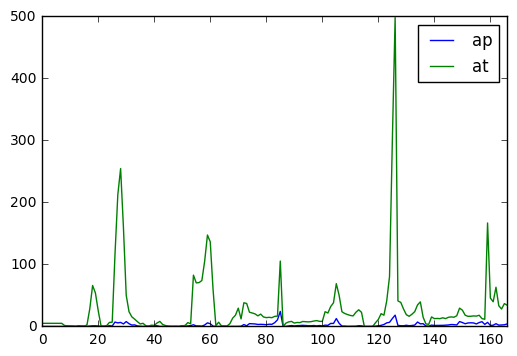

In [66]:
# let's plot some variables from the defaulting
# dataset
gd_sme_d_cl_samp[['ap', 'at']].plot()

In [68]:
# get accounts payable for defaulting enterprizes
gd_sme_d_cl_samp_apy = gd_sme_d_cl_samp[['tic', 'fyear', 'ap']].set_index(['tic', 'fyear']).unstack('tic')
gd_sme_d_cl_samp_apy.iloc[:,0:5]

ap                            
tic    3AMBEQ 3NCEYQ  AOGSQ  AXIHQ  BMERQ
fyear                                    
2000.0  0.065  0.305  0.109  7.833  0.057
2001.0  0.016  0.972  0.159  4.445  0.022
2002.0  0.003  0.662  0.138  2.214  0.059
2003.0  0.000  0.726  1.204  2.504  0.043
2004.0  0.000  0.253  0.691  0.882  0.119
2005.0  0.000  0.690  7.053  0.289  0.191
2006.0  0.000  0.976  5.701  0.045  0.265
2007.0  0.000  1.057  6.491  0.216  0.142
2008.0  0.000  0.691  4.082  0.036  1.054
2009.0  0.000    NaN    NaN  0.547  0.423
2010.0  0.000    NaN    NaN  1.103  0.890
2011.0  0.000    NaN    NaN  1.175  1.340

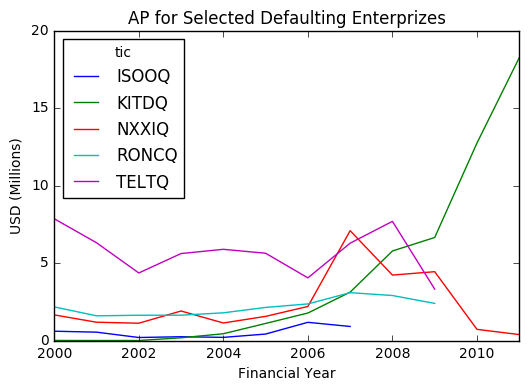

In [69]:
# plot a random range of sme
aap4fy = gd_sme_d_cl_samp_apy.iloc[:,10:15].plot(y='ap')
aap4fy.set_xlabel('Financial Year')
aap4fy.set_ylabel('USD (Millions)')
aap4fy.set_title('AP for Selected Defaulting Enterprizes')

In [71]:
# plot with interpolation
#aap4ify = gd_sme_d_cl_samp_apy.iloc[:,10:15].interpolate().plot(y='ap')
#aap4ify.set_xlabel('Financial Year')
#aap4ify.set_ylabel('USD (Millions)')
#aap4ify.set_title('AP for Selected Defaulting Enterprizes (Interpolated)')

In [72]:
# we realize that interpolating a defaulting enterprize
# after its default is not prudent
gd_sme_d_cl_samp_bd = gd_sme_d_cl_samp[['tic', 'fyear', 'dldte']]
gd_sme_d_cl_samp_bdy = gd_sme_d_cl_samp_bd.set_index(['tic', 'fyear']).unstack('tic')

In [73]:
gd_sme_d_cl_samp_bdy.iloc[:,10:15]

dldte                                                
tic          ISOOQ       KITDQ       NXXIQ       RONCQ       TELTQ
fyear                                                             
2000.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2001.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2002.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2003.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2004.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2005.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2006.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2007.0  20091223.0  20130819.0  20120117.0  20120223.0  20120222.0
2008.0         NaN  20130819.0  20120117.0  20120223.0  20120222.0
2009.0         NaN  20130819.0  20120117.0  20120223.0  20120222.0
2010.0         NaN  20130819.0  20120117.0         NaN         NaN
2011.0         NaN  20130819.0  20120117.0         NaN         NaN

In [74]:
gd_sme_d_cl_samp.iloc[:,-17:].head(1)

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,rect,rectr,sale_x,seq,wcap,xint
0,0.065,5.051,4.986,4.986,0.005,-0.13,-0.116,0.0,0.065,-0.067,-1.061,0.003,0.003,0.038,4.986,-0.057,0.0


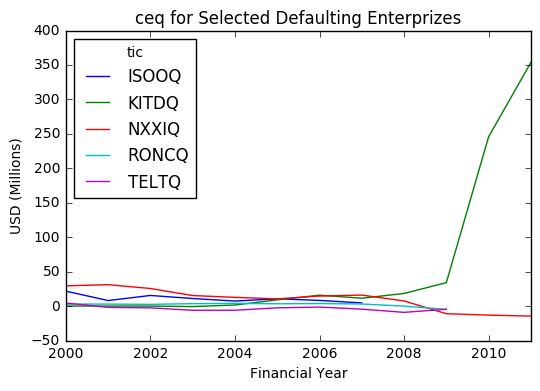

In [75]:
# let's now plot some additional variables
var = 'ceq'
c1 = 10
c2 = 15
gd_sme_d_cl_samp_v = gd_sme_d_cl_samp[['tic', 'fyear', var]]
gd_sme_d_cl_samp_vy = gd_sme_d_cl_samp_v.set_index(['tic', 'fyear']).unstack('tic')
vfy = gd_sme_d_cl_samp_vy.iloc[:,c1:c2].plot(y=var)
vfy.set_xlabel('Financial Year')
vfy.set_ylabel('USD (Millions)')
vfy.set_title(var + ' for Selected Defaulting Enterprizes')

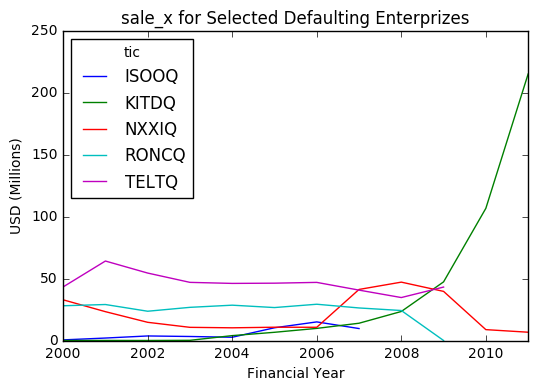

In [76]:
var = 'sale_x'
c1 = 10
c2 = 15
gd_sme_d_cl_samp_v = gd_sme_d_cl_samp[['tic', 'fyear', var]]
gd_sme_d_cl_samp_vy = gd_sme_d_cl_samp_v.set_index(['tic', 'fyear']).unstack('tic')
vfy = gd_sme_d_cl_samp_vy.iloc[:,c1:c2].plot(y=var)
vfy.set_xlabel('Financial Year')
vfy.set_ylabel('USD (Millions)')
vfy.set_title(var + ' for Selected Defaulting Enterprizes')

In [77]:
gd_sme_samp = gd_sme_samp[gd_sme_samp.fyear<2008]

In [78]:
fdd2 = gd_sme_samp[['fyear', 'tic', 'default']].groupby(['fyear', 'default'])['tic'].count().reset_index()
fdd2 = fdd2.set_index(['fyear', 'default'])
fdd2 = fdd2.unstack('default')
fdd2.columns = fdd2.columns.droplevel(0)
fdd2['ratio_pct'] = fdd2.iloc[:,1] / (fdd2.iloc[:,1] + fdd2.iloc[:,0]) * 100
fdd2.head()

default,0.0,1.0,ratio_pct
fyear,,,
2000.0,250,16,6.015038
2001.0,250,16,6.015038
2002.0,250,16,6.015038
2003.0,250,16,6.015038
2004.0,250,16,6.015038


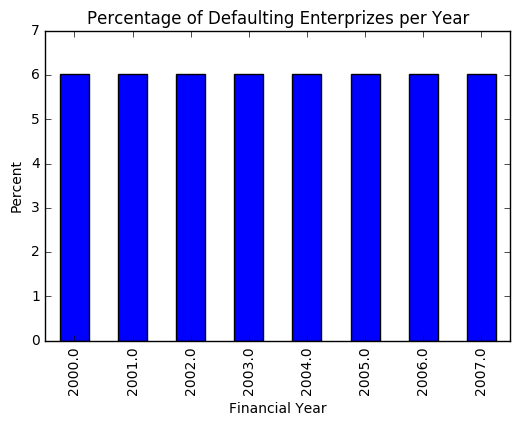

In [79]:
bx = fdd2['ratio_pct'].plot(kind='bar')
bx.set_title('Percentage of Defaulting Enterprizes per Year')
bx.set_xlabel('Financial Year')
bx.set_ylabel('Percent')

In [80]:
gd_sme_samp.columns

Index([u'tic', u'gvkey', u'datadate', u'fyear', u'indfmt', u'conm', u'curcd',
       u'fyr', u'costat', u'fic', u'addzip', u'city', u'dlrsn', u'fyrc',
       u'state', u'dldte', u'default', u'ap', u'at', u'ceq', u'ceql', u'ch',
       u'ebit', u'ebitda', u'intan', u'lt', u'ni', u're', u'rect', u'rectr',
       u'sale_x', u'seq', u'wcap', u'xint'],
      dtype='object')

In [81]:
gd_sme_samp.iloc[:,-17:].isnull().sum()

ap        0
at        0
ceq       0
ceql      0
ch        0
ebit      0
ebitda    0
intan     0
lt        0
ni        0
re        0
rect      0
rectr     0
sale_x    0
seq       0
wcap      0
xint      0
dtype: int64